# Исследовательский анализ общественного питания рынка Москвы

- Автор: *Денисова Дарья Валерьевна*
- Дата: *09.06.2025*

## Цель и задачи  

**Цель:** Провести исследовательский анализ для открытия заведение общественного питания в Москве.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.   
4. Сформулировать выводы по проведённому анализу.


## Данные

Для анализа предоставлены данные сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. 

<font color='blue'>**Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер*</font> 

Данные состоят из двух датасетов:

- `rest_info.csv` — информацию о заведениях общественного питания;
- `rest_price.csv` —  информацию о среднем чеке в заведениях общественного питания.

### Описание датасета `rest_info.csv`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  - 0 — заведение не является сетевым;
  - 1 — заведение является сетевым.
- `seats` — количество посадочных мест.

### Описание датасета `rest_price.csv`

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - Средний счёт: 1000–1500 ₽;
    - Цена чашки капучино: 130–220 ₽;
    - Цена бокала пива: 400–600 ₽.
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца ***avg_bill***, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений;
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число;
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца ***avg_bill***, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений;
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число;
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

---

## 1. Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `rest_info.csv` и `rest_price.csv`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `df_i` и `df_p`.

In [1]:
# Комментарий ревьюера 0
# Для задания по расчету корреляции требуется установить библиотеку
# Устанавливаем библиотеку phik
!pip install phik -U    
# Библиотека для расчета коэффициента корреляции phi_k
#from phik import phik_matrix

In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# Выгружаем данные в переменные bank_df и clients_df
df_i = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
df_p = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

**Познакомимся с данными датасета `rest_info.csv`** — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [4]:
# Выводим информацию о датафрейме
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
# Выведим 10 случайных строк на экран
df_i.sample(n=10, replace=True)

,id,name,category,address,district,hours,rating,chain,seats
8335,a68f201e58ee4baf9252df0f2b3c6fa0,Baer Coffee,кофейня,"Москва, Окская улица, 1, корп. 1",Юго-Восточный административный округ,пн 00:00–21:00; вт-сб 09:00–21:00; вс 00:00–21:00,4.4,0,80.0
4982,1d1cb24badbc4723898cc67acc4ff285,Mañana,"бар,паб","Москва, Пятницкая улица, 29",Центральный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–03:00; вс 12:00...",4.7,0,306.0
3501,6be6143c358549e4885aad0d2b3bd35b,Americano Black Coffee & Food,ресторан,"Москва, Большой Козихинский переулок, 18/8",Центральный административный округ,"ежедневно, 08:00–23:00",4.4,1,NaN
5137,bd225216d97d489d97e0da160b8df5ab,Knockout coffee,кофейня,"Москва, Летниковская улица, 4, стр. 5",Центральный административный округ,пн-пт 08:00–19:00; сб 09:00–19:00,4.3,0,45.0
2509,1b2be3b3b9414f758b81f268b5770787,Донер кебаб,быстрое питание,"Москва, Комсомольская площадь, 5",Центральный административный округ,"ежедневно, круглосуточно",3.8,1,NaN
4629,ac6ab1330fea486bbbf27d46b2f54d55,ТрапеZа,столовая,"Москва, улица Покровка, 47А",Центральный административный округ,пн-пт 09:00–18:00,4.1,1,NaN
3329,c6f67cdd79dd47ee9f8f89d022049709,Кафе-Столовая Sio,столовая,"Москва, Кутузовский проспект, 36, стр. 4",Западный административный округ,пн-пт 09:30–18:00,4.0,0,NaN
7559,b5b8f22133e345cd9b5bd80965ebfc96,"Кофе, шаурма, тандыр",быстрое питание,"Москва, улица Судакова, 11, стр. 2",Юго-Восточный административный округ,"ежедневно, 08:00–22:00",4.2,0,35.0
278,074c337d31a549bf9da00452b8335a82,MuiNe,ресторан,"Москва, Староватутинский проезд, 14",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",3.4,0,100.0
2957,264eb2816a0d4666b7e058bb70976ea5,Отменная пельменная,кафе,"Москва, Измайловское шоссе, 73Ж, стр. 5",Восточный административный округ,"пн,вт,чт,пт,сб,вс 09:00–15:30",4.7,0,80.0


*Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведения общественного питаня в Москве.*

После первичного анализа данных можно сделать следующие выводы:
- Присутствует столбец `id`, которого не было в описании. По виду этот столбец показывает id заведения и должно иметь уникальное значение. Следует проверить его на дубликаты; 
- Названия столбцов корректны и представлены в едином стиле snake case;
- Представленные данные имеют 3 типа:
    - тип `object` - 6 столбцов `id`, `name`, `category`, `address`, `district` и `hours`;
    - тип `float64` - 2 столбца `rating` и `seats`;
    - тип `int64` столбец `chain` который показывает признак является ли заведение сетевым содержит значения 1 или 0 — размерность этих данных можно оптимизировать.
- Пропуски содержатся в 2х столбцах `hours` и `seats` . Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.

**Теперь познакомимся с данными датасета `rest_price.csv`.**

In [6]:
# Выводим информацию о датафрейме
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [7]:
# Выведим 10 случайных строк на экран
df_p.sample(n=10, replace=True)

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
1393,2293f7b006bb4cd59618bfdabd27fdc2,NaN,Цена чашки капучино:от 60 ₽,NaN,60.0
468,06e993464763467e92a8e478dd7ec74b,NaN,Средний счёт:150–200 ₽,175.0,NaN
2548,ecdc8b6e792642abba298f3c8dff5bc7,средние,Средний счёт:290–490 ₽,390.0,NaN
2246,298e19da5c384bb9a359b62f00caa92f,средние,Средний счёт:1000 ₽,1000.0,NaN
2977,3edde1ac13e346968a5d17f8f1d1f53b,средние,Средний счёт:390–460 ₽,425.0,NaN
3704,7a8473e6c5fb40b68f8f2d5aaeecb646,NaN,Средний счёт:от 30 ₽,30.0,NaN
3732,07f7bc3ddd8e47dc8d51d9fea178a154,средние,Средний счёт:100–300 ₽,200.0,NaN
1684,aff92ff5c7aa4de0854a5278d24493ec,средние,Средний счёт:1000 ₽,1000.0,NaN
2418,41f777a1dae741aba72aa036573f1598,средние,Средний счёт:600–800 ₽,700.0,NaN
2425,5dbffa38eddf42fda3155bf17442efbc,средние,Средний счёт:300–350 ₽,325.0,NaN


*Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.*

По аналогии с предыдущим датасетом можно отметить, что:

- Так же присутствует столбец `id`, которого не было в описании;
- Названия столбцов корректны и представлены в едином стиле snake case;
- Данные имеют 2 типа:
    - тип `object` - 3 столбцов `id`, `price` и `avg_bill`;
    - тип `float64` - 2 столбца `middle_avg_bill` и `middle_coffee_cup`;
- Все столбцы имеют пропуски, кроме `id` 
- Значения и тип данных в столбцах соответствуют описанию.

<div class="alert alert-lavender" style="background-color: #e6e6fa; color: #000;"> Первичное знакомство показывает, что количество строк в данных о заведении более чем в 2 раза чем в данных о среднем счете, это говорит о том что больше чем у половины заведений нет информации о среднем чеке. Так же есть пропуски с информацией о средней стоимости заказа. Все названия столбцов представлены в едином стиле, типы данных в большинстве случаев предоставлены корректны и они соответсвуют описанию. </div>

Теперь объединим датафреймы по столбцу `id` используя метод `merge()` Будем использовать левое приосединение, чтобы сохранить все данные по заведениям

In [8]:
# Соединяем датафреймы по столбцу id
df = df_i.merge(df_p, on = 'id', how = 'left')

In [9]:
# Снова выведим информацию уже объединенного датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


---

Мы закончили первый этап исследовательского анализа. На этом этамы мы сделали следующие действия:
- Загрузили библиотеку pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции;
- Загрузили данные из 2х датафреймов и познакомились с ними;
- Объеденили данные двух датасетов в один, с которым продолжим работу;
- После объединения у нас имеются данные из 8406 строк и 13 столбцов. В данных присутсвтуют пропуски, которые мы детально разберем в следующем шаге - предобработки данных. К нему и приступим. 

---

In [10]:
# Комментарий ревьюера 0
# создаем копию датасета до преобразования для возможности проверить сделанные изменения после предобработки
# только не надо эту копию потом использовать в проекте
temp = df.copy() 
len(temp)

8406

## 2. Предобработка данных

### 2.1. Оптимизируем тип данных

Приведем оптимизацию целочисленных данных по столбцу `chain`. Т.к. данные содеражт пропуски то используем специальный nullable type


In [11]:
# Оптимизируем целочисленный тип данных в датафрейме
df['chain'] = df['chain'].astype('Int8')

Уменьшим разрядность cтолбцах с вещественными значениями, т.к. данные имеют небольшие значения. Используем метод `pd.to_numeric` с аргументом `downcast='integer'`

In [12]:
# Оптимизируем тип данных в столбце rating
for column in ['rating', 'middle_avg_bill','middle_coffee_cup','seats']:
    df[column] = pd.to_numeric(df[column], downcast='float')    

In [13]:
# Проверим типы данных в датафрейме с помощью атрибута dtypes
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   Int8
seats                float32
price                 object
avg_bill              object
middle_avg_bill      float32
middle_coffee_cup    float32
dtype: object

Типы данных были успешно оптимизированы с понижением размерности

### 2.2. Проверяем наличие пропусков в данных

При первичном анализе мы обнаружили пропуски в данных. 

Проверим пропуски в датафрейме. Узнаем абсолютное и относительное количество пропусков.

In [14]:
# Применяем метод isna() к датафрейму df
df.isna().sum().to_frame().sort_values(by=0, ascending=False).style.background_gradient(cmap='coolwarm', axis=0).format("{:.2f}")

,0
middle_coffee_cup,7871.00
middle_avg_bill,5257.00
price,5091.00
avg_bill,4590.00
seats,3611.00
hours,536.00
id,0.00
name,0.00
category,0.00
address,0.00


In [15]:
# Подсчитываем долю строк с пропусками
df.isna().mean().to_frame().sort_values(by=0, ascending=False).style.background_gradient(cmap='coolwarm', axis=0).format("{:.2f}")

,0
middle_coffee_cup,0.94
middle_avg_bill,0.63
price,0.61
avg_bill,0.55
seats,0.43
hours,0.06
id,0.00
name,0.00
category,0.00
address,0.00


In [16]:
# Комментарий ревьюера 0
import pandas as pd        # Импортируем билиотеку (вдруг она не установлена в окружении)
tmp = df.copy()            # Делаем копию текущего датасета
missing_stats = pd.DataFrame({'Кол-во пропусков': tmp.isnull().sum(),'Доля пропусков': tmp.isnull().mean().round(4)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0].sort_values(by = 'Кол-во пропусков', ascending=False)
missing_stats.style.background_gradient(cmap='coolwarm').format("{:.2f}") if not missing_stats.empty else "Пропусков в данных нет"

,Кол-во пропусков,Доля пропусков
middle_coffee_cup,7871.00,0.94
middle_avg_bill,5257.00,0.63
price,5091.00,0.61
avg_bill,4590.00,0.55
seats,3611.00,0.43
hours,536.00,0.06


In [17]:
# Добавим новую переменную для подсчета общего кол-во пропусков в датафрейме в абсолютных и относительных значениях
# Общее кол-во пропусков в датафрейме
count_nan = df.isna().sum().sum()

# Общее кол-во заполненных данных в датафрейме
count_not_nan = df.notna().sum().sum()

# Доля всех пропусков в датафрейме
share_nan = count_nan / (count_not_nan + count_nan)

print(count_nan)
print(share_nan * 100) 

26956
24.667362140595543


Всего в  датафрейме обнаружено <font color='blue'> 26956 пропусков </font> что составляет <font color='blue'> 24.67% </font> всех данных. 

Большое кол-во пропусков связаны с объединением датафреймов. Данные по средней цене были только у половины заведений. Расмотримм пропуски по столбцам:
- Самое большое кол-во пропусков в столбце `middle_coffee_cup` <font color='blue'> (7847) </font> — это <font color='blue'> 94%</font> данных. Т.к. данные в этом столбце заполняются только по заполненным полям с чашкой капучино, то пропуски могут быть связаны с заведением, например если это кафе или ресторан, то там вероятнее всего будет средний чек.  Стоит проверить столбец `avg_bill` со значением `Цена чашки капучино` если по таким строкам есть пропуски в `middle_coffee_cup` то сможем их заполнить, если нет то пропуски в данном случае случайные типа MAR. Так же стоит проверить категорию заведений `кофейня` и понять насколько информативен этот столбец для анализа т.к. заполненность его менее 6%.
- По столбцу `middle_avg_bill` в котором <font color='blue'> 5257 пропусков </font> с долей <font color='blue'> 63%</font>. Аналогично проверим их по значению `Средний счёт` в столбце `avg_bill` если все данные заполнены то пропуски случайные или связаны с отсутсвием данных по средней цене.
- По столбцу `price` в котором <font color='blue'> 5091 пропуска </font> с долей <font color='blue'> 61%</font>. Тут больше половины пропусков связаны с объединением датафрейма. Еще стоит посмотреть как присвоена катеогрия цены и зависимость от столбцов `avg_bill` если она есть то возможно заполнить данные значением, если явной зависимости нет то оставим без изменений.
- По столбцу `avg_bill` всего <font color='blue'> 4590 пропусков </font> что равно <font color='blue'> 55% </font> Аналогично пропуски связанны с объединением датафреймов, изначально данные о ценах у нас были только у половины заведений. Оставим их без изменений что бы не потерять половину данных для анализа.
- По столбцу `seats` обноружено <font color='blue'> 3611 пропуска </font> что составляет <font color='blue'> 43% </font> данных. Возможно в некоторых заведениях нет определенного кол-ва мест (например столовая или паб) так же данные могли быть утеряны при их сбре. Оставим эти пропуски без изменений. 
- И последний столбец с пропусками `hours` в нем: <font color='blue'> 536 пропусков </font>  — это <font color='blue'> 6% </font> данных. Пропуски могут быть связаны с техническими ошибками данных или с их сбором а так же заведении могло не указать время работы. Хоть их не так и много, удалять мы их так же не будем. 

**Проверим пропуски по `middle_coffee_cup`**

In [18]:
# Проверяем по столбцу middle_coffee_cup и значения 'Цена чашки капучино'
df.loc[df['avg_bill'].str.startswith('Цена чашки капучино', na=False) & df['middle_coffee_cup'].isna()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup


Пропущенных значенй с подстроки «Цена одной чашки капучино» по столбцу `avg_bill` нет, значит все пропуски в этих столбцах не случайны. Теперь посмотрим на категории заведений и посмотрим есть ли там кофейни, и по ним посмотрим пропущенные значения по столбцу `middle_coffee_cup`

In [19]:
# Выведим значения по столбцу 'category'
df['category'].value_counts()

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

1413 кофейн что составляет 16,8% от всех данных. Проверим пропуски только по кофейням

In [20]:
# Фильтруем только кофейни
coffee_shops = df[df['category'] == 'кофейня']

# Считаем заполненные данные в нужных столбцах
coffee_shops[['middle_coffee_cup', 'middle_avg_bill']].notna().agg(['sum', 'mean'])

,middle_coffee_cup,middle_avg_bill
sum,521.000000,200.000000
mean,0.368719,0.141543


Видим что по кофейням цены в большинстве указаны по столбцу `middle_coffee_cup` если полностью убрать столбец из исследования то можем потерять данные данные по 36% кофеин. Отсавим этот столбец в датафрейме

**Проверим пропуски по `middle_avg_bill`**

In [21]:
# Проверяем заполненые значения в middle_avg_bill если в avg_bill начинается с 'Средний счёт'
df.loc[df['avg_bill'].str.startswith('Средний счёт', na=False) & df['middle_avg_bill'].isna()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup


Пропущенных значенй нет, значит все пропуски в этих столбцах не случайны. Оставим их без изменений

**Проверим пропуски по `price`**

In [22]:
# Проверим пропуски по столбцу 'price' и заполненные поля по 'avg_bill'
df.loc[df['price'].isna() & ~ df['avg_bill'].isna()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
27,cb3ade780c844bb496655304fe7f0db0,Шаурму Х@чу,быстрое питание,"Москва, улица Дыбенко, 7, стр. 1",Северный административный округ,"пн-пт 08:00–22:00; сб,вс 10:00–22:00",4.1,0,4.0,NaN,Средний счёт:от 240 ₽,240.0,NaN
32,4e5314c970cc47c58e5d24ee3ee70fa9,Додо Пицца,пиццерия,"Москва, Коровинское шоссе, 23, корп. 1",Северный административный округ,"ежедневно, 09:00–23:00",4.3,1,46.0,NaN,Средний счёт:328 ₽,328.0,NaN
34,629ac86faa0b4ca49eda1ee27cbda5bb,Домино'с Пицца,пиццерия,"Москва, Клязьминская улица, 11, корп. 4",Северный административный округ,"ежедневно, 10:00–23:00",4.2,1,247.0,NaN,Средний счёт:от 500 ₽,500.0,NaN
49,a8bbd74669074068ab44bc567022ee27,2U-Ту-Ю,пиццерия,"Москва, Ижорская улица, 8А",Северный административный округ,"ежедневно, круглосуточно",2.7,0,NaN,NaN,Средний счёт:900 ₽,900.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,119c3237f9ac45c789debbc0f377784d,Ситипицца,пиццерия,"Москва, Ферганская улица, 12",Юго-Восточный административный округ,"ежедневно, 10:00–23:00",4.2,0,4.0,NaN,Средний счёт:300–700 ₽,500.0,NaN
8383,3abfb264a4a6489e84167880bad5f109,Pizza24/7,пиццерия,"Москва, улица Юных Ленинцев, 10/15к1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,0,NaN,NaN,Средний счёт:150 ₽,150.0,NaN
8385,86a33e2c440d4a888d865295ecaa24ed,Cafio,кофейня,"Москва, Новохохловская улица, 49",Юго-Восточный административный округ,"пн-пт 07:00–22:00; сб,вс 07:00–21:00",4.7,0,NaN,NaN,Цена чашки капучино:80–120 ₽,NaN,100.0
8399,71cc394927204d45b81c3a91edb47955,"Пекарня, кафе-гриль",булочная,"Москва, Болотниковская улица, 52, корп. 2",Юго-Западный административный округ,"ежедневно, круглосуточно",4.2,0,50.0,NaN,Средний счёт:50–250 ₽,150.0,NaN


Видим что данные в `avg_bill` заполнены по 353 строкам это 6,9% данных можем заполнить по столбцу `price`. Теперь посмотрим как распределяется категория цен по столбцу price в зависимости от `middle_avg_bill` и `middle_coffee_cup` посмотрим медиану, среднее, минимальное и максимальные значения. Применим метод `pivot_table()`

In [23]:
df.pivot_table(index = 'price', values = 'middle_avg_bill', aggfunc = ['median', 'mean', 'max', 'min', 'count'])

,median,mean,max,min,count
,middle_avg_bill,middle_avg_bill,middle_avg_bill,middle_avg_bill,middle_avg_bill
price,,,,,
высокие,2000.0,2472.631592,35000.0,0.0,437
выше среднего,1250.0,1344.189209,4500.0,375.0,481
низкие,180.0,217.311829,600.0,90.0,93
средние,500.0,598.908264,2150.0,165.0,1668


In [24]:
df.pivot_table(index = 'price', values = 'middle_coffee_cup', aggfunc = ['median', 'mean', 'max', 'min', 'count'])

,median,mean,max,min,count
,middle_coffee_cup,middle_coffee_cup,middle_coffee_cup,middle_coffee_cup,middle_coffee_cup
price,,,,,
высокие,250.0,250.000000,250.0,250.0,1
выше среднего,203.0,203.000000,256.0,150.0,2
низкие,139.0,136.614029,256.0,60.0,57
средние,200.0,209.403671,1568.0,60.0,218


Можно сразу обратить внимание на анамальное распределение: например в категории высоких цен есть позиции у которыx минимальная цена = 0 или чашка капучино за 1568 (что скорее всего явлется выбросом, которые мы проверим позже) находится в категории средней цены а не высокой, максимальное значение чашки кофе у всех категорий похожи, а заначит категории цен определяют и другие факторы, такие как например расположение места. Оставим этим пропуски без изменений

### 2.3. Явные и неявные дубликаты в данных

Сначала проверим данные на полные дубликаты в датафреймах:

In [25]:
# Проверяем полные дубликаты
df.duplicated().sum()

0

В датафреймах нет полных дубликатов строк. Тепер посмотрим на уникальные значения в категорийных данных — среди них административный район и категория заведения.

In [26]:
# Проверяем уникальные значения в столбцах
for column in ['district', 'category']:
    print(f'Уникальные значения в столбце {column}:')
    print(df_i[column].sort_values().unique())
    print()

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']



Все значения уникальны. Предлагаю переименовать названия административных районов, сократив их до аббревиатуры для удобства восприятия

In [27]:
# Создадим словарь аббревиатуры для административных районов Москвы
new_columns_district = {'Восточный административный округ':'ВАО', 
                        'Западный административный округ':'ЗАО',                                               
                        'Северный административный округ':'CАО',                         
                        'Северо-Восточный административный округ':'СВАО',
                        'Северо-Западный административный округ':'СЗАО',
                        'Центральный административный округ':'ЦАО',
                        'Юго-Восточный административный округ':'ЮВАО',
                        'Юго-Западный административный округ':'ЮЗАО',
                        'Южный административный округ':'ЮАО'}
df['district'] = df['district'].replace(new_columns_district)

In [28]:
df['district'].value_counts()

ЦАО     2242
CАО      900
ЮАО      892
СВАО     891
ЗАО      851
ВАО      798
ЮВАО     714
ЮЗАО     709
СЗАО     409
Name: district, dtype: int64

Отлично, все значения переименованы. Видим что в центральном районе больше всего заведений, это и неудивительно.

Теперь проверим текстовые поля такие как наименование заведений и адрес. Т.к. заведения могут быть написаны по разному, то перезапишем все названия в нижний регистр и уберем лишние пробелы. 

In [29]:
# Посчитаем количество уникальных значений в наименовании и адресе заведений
display(df['name'].nunique())
display(df['address'].nunique())

5614

5753

Сразу видно отличе в кол-ве наименования и адреса, это говорит о наличии сетевых заведений. 

In [30]:
# Выгрузим библиотеку для работы с регулярными выражениями
import re
# Создадим функцию для приведения текста в нижний регистр и удаления лишних знаков препинания и пробелов
def normalize_text(text):
    if not isinstance(text, str):
        return text
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text.strip())
    return text

# Применяем к столбцам с текстом
df['name'] = df_i['name'].apply(normalize_text)
df['address'] = df_i['address'].apply(normalize_text)

In [31]:
# Снова посчитаем количество уникальных значений в наименовании заведений
display(df['name'].nunique())
display(df['address'].nunique())

5498

5751

Убрали 116 что чуть больше 2% неявных дубликатов в столбце 'name' преобразовав наименование заведений и всего 2 строчки адреса, но даже маленькие результаты делают наши данные чище 😀

Т.к. название заведения и его адрес - дожны быть уникальными, потому что не может быть 2 одинаковых заведений по 1 адресу, то следует проверить на неявные дубликаты объеденим эти 2 столбца

In [32]:
potential_duplicates = df.groupby(['name', 'address']).size().reset_index(name='count')
duplicates = potential_duplicates[potential_duplicates['count'] > 1]
display(duplicates)

,name,address,count
1453,more poke,москва волоколамское шоссе 11 стр 2,2
3045,в парке вкуснее,москва северный административный округ район л...,2
4249,кафе,москва парк ангарские пруды,2
6194,раковарня клешни и хвосты,москва проспект мира 118,2
7483,хлеб да выпечка,москва ярцевская улица 19,2


Вот и нашли еще 5 неявных дубликатов.

In [33]:
# Удаляем дубликаты
df = df.drop_duplicates(subset=['name', 'address'], keep='first')

# Проверим результат
print(f"Было строк: {len(temp)}")
print(f"Стало строк: {len(df)}")
print(f"Удалено дубликатов: {len(temp) - len(df)}")

Было строк: 8406
Стало строк: 8401
Удалено дубликатов: 5


Проверим неявные дубликаты по `id` этот столбец должен иметь уникальное значение:

In [34]:
# Проверяем неявные дубликаты в датафрейме
df.duplicated(subset=['id']).sum()

0

Мы проверили данные на явные и неявные дубликаты. Явных дубликатов не обнаружено, убрали 2% неявных дубликатов в датафрейме в столбце `name` приведя наименование заведений к нижнему регистру и удалив лишние пробелы и знаки препинания. А так же нашли неявные дубликати в связке наименования заведения + адрес и удалили 5 неполных дубликатов, что составило всего 0,06%. И датафрейм сократился до 8401 строки

### 2.4. Добавляем новый столбец is_24_7

Создадим новый столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
- логическое значение `True` — если заведение работает ежедневно и круглосуточно;
- логическое значение `False` — в противоположном случае.

Используем метод `str.contains()` для поиска подстрок или шаблонов в текстовых данных.

In [35]:
# Создаем новый столбец is_24_7
df['is_24_7'] = df['hours'].str.contains(r'ежедневно, круглосуточно', case=False, regex=True)

df['is_24_7'].value_counts()

False    7136
True      730
Name: is_24_7, dtype: int64

In [36]:
# Комментарий ревьюера 0
# Проверим правильность категоризации
tmp0, col1 = df.copy(), 'is_24_7'
a1 = len(tmp0[tmp0.hours != 'ежедневно, круглосуточно'])
a2 = len(tmp0[tmp0.hours == 'ежедневно, круглосуточно'])

print(" Количество не работающих ежедневно и круглосуточно", a1,
      '\n', "Количество работающих ежедневно и круглосуточно", a2,'\n')
print("Количество категорий полученное в проекте:")
tmp0[col1].value_counts()

 Количество не работающих ежедневно и круглосуточно 7671 
 Количество работающих ежедневно и круглосуточно 730 

Количество категорий полученное в проекте:


False    7136
True      730
Name: is_24_7, dtype: int64

730 заведения, которые работают круглосуточно.

In [37]:
# Комментарий ревьюера 0
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
 Осталось строк в датасете после обработки 8401 
 Удалено строк в датасете после обработки 5 
 Процент потерь 0.06


### 2.5. Промежуточные выводы после предобработки

На этом предобработка завершена. 

В результате предобработки данных были выполнены следующие действия:

- Мы объединили датафрейм о заведениях общественного питания `rest_info.csv` и датафрейм о среднем чеке в заведениях общественного питания `rest_price.csv` использовав левое присоединение, что бы сохранить все данные о заведении для дальнейшего анализа.
- После объединения датафреймой мы получили почти 25% пропусков всех данных. Все пропуски мы оставили без изменений что бы не исказить результаты исследования;
- Скорректировали значения по столбцу `district` сократив наименование на аббревиатуры по административным районам Москвы для лучшей читаемости;
- Проверили данные на неявные дубликаты в столбце `name` и нашли 2% преобразовав наименование заведений. Так же обнаружили 5 строк (0,06%) неаявных дубликатов в свяке наименование + адрес и удалилии эти данные из датасета;
- Проверили данные на явные дубликаты - их в данных нет;
- Добавили новый столбец `is_24_7` в датафрейм который показывает работает заведение круглосуточно или нет. Столбец имеет будевое значение, если `True` — если заведение работает ежедневно и круглосуточно `False` — в противоположном случае;
- Всего в датафрейме осталос 8401 строк для дальнейшего анализа. А было очищено 0,06% данных

---  


## 3. Исследовательский анализ данных

### 3.1. Категории заведений

Начнём с категории заведений. Рассмотрим какие категории заведений представлены в данных? Исследуем количество объектов общественного питания по каждой категории. Для этого построим столбчатую диаграмму, которая показывает сравнение количественных значений между категориями

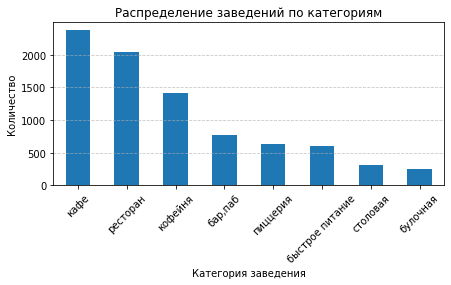

In [38]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с использованием plot(kind='bar')
df['category'].value_counts().plot(kind = 'bar',
                                   rot = 45,
                                  legend = False,
                                  title = f'Распределение заведений по категориям',
                                  xlabel = 'Категория заведения', 
                                  ylabel = 'Количество')

# Добавляем сетку графика
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Выводим график
plt.show()

In [39]:
# Считаем проценты
counts_with_percent = (df['category'].value_counts(normalize=True) * 100).round(1)

# Объединяем в одну таблицу
result_table = pd.DataFrame({
    'Количество': df['category'].value_counts(),
    'Доля (%)': counts_with_percent
})
result_table.style.background_gradient(cmap='coolwarm', axis=0).format("{:.1f}")

,Количество,Доля (%)
кафе,2376.0,28.3
ресторан,2042.0,24.3
кофейня,1412.0,16.8
"бар,паб",764.0,9.1
пиццерия,633.0,7.5
быстрое питание,603.0,7.2
столовая,315.0,3.7
булочная,256.0,3.0


<div class="alert alert-lavender" style="background-color: #e6e6fa; color: #000;"> По графику и таблице видно что кафе и рестораны составляют более 50% всех заведений, кофейни тоже популярны они занимает 3 место с 16,8% рынка. Бары, пабы занимают 9% рынка. Пиццерия и быстрое питание занимают 7,5%рынка, менее восстребованые столовые и булоччные у них 3% рынка. При открытии заведении стоит учитывать этот факт. </div>

### 3.2. Административные районы Москвы

Рассмотри теперь административные районы Москвы и исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

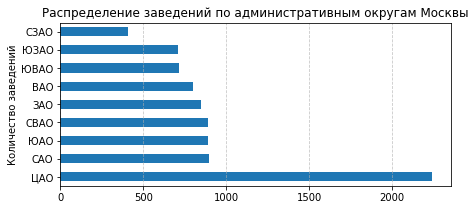

In [40]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с использованием plot(kind='bar')
df['district'].value_counts().plot(kind = 'barh',
                                   rot = 0,
                                  legend = False,
                                  title = f'Распределение заведений по административным округам Москвы',
                                  xlabel = 'Количество заведений', 
                                  ylabel = 'Округ Москвы')

# Добавляем сетку графика
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Выводим график
plt.show()

In [41]:
# Считаем проценты
counts_with_percent = (df['district'].value_counts(normalize=True) * 100).round(1)

# Объединяем в одну таблицу
result_table = pd.DataFrame({
    'Количество': df['district'].value_counts(),
    'Доля (%)': counts_with_percent
})
result_table.style.background_gradient(cmap='coolwarm', axis=0).format("{:.1f}")

,Количество,Доля (%)
ЦАО,2242.0,26.7
CАО,897.0,10.7
ЮАО,892.0,10.6
СВАО,890.0,10.6
ЗАО,850.0,10.1
ВАО,798.0,9.5
ЮВАО,714.0,8.5
ЮЗАО,709.0,8.4
СЗАО,409.0,4.9


<div class="alert alert-lavender" style="background-color: #e6e6fa; color: #000;"> Лидер по кол-ву заведений конечно же Центральный округ, в нем располагается 2242 заведения что занимает 26,7%. Второе место с долей чуть больше 10% делят сразу 4 округа это - Северный, Южный, Свеверо-Восточный и Западный. Меньше всего заведений в Северо-Западном округе всего 409 с долей 4,9% </div>

Рассмотрим теперь отдельно Центрально административный округ Москвы и посмотрим какие заведения там преобладают. Для этого построим линейчатую диаграмму

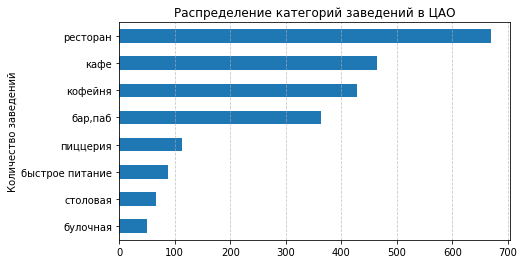

In [42]:
# Отфильтруем датафрейм по административному району Москвы
cao_df = df[df['district'] == 'ЦАО']

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 4))

# Строим линейчатую диаграмму с использованием plot(kind='barh')
cao_df['category'].value_counts().sort_values(ascending=True).plot(kind = 'barh',
                                   rot = 0,
                                  legend = False,
                                  title = f'Распределение категорий заведений в ЦАО',
                                  xlabel = 'Количество заведений', 
                                  ylabel = 'Категория заведений')

# Добавляем сетку графика
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Выводим график
plt.show()

In [43]:
# Считаем проценты
counts_with_percent = (cao_df['category'].value_counts(normalize=True) * 100).round(1)

# Объединяем в одну таблицу
result_table = pd.DataFrame({
    'Количество': cao_df['category'].value_counts(),
    'Доля (%)': counts_with_percent
})
result_table.style.background_gradient(cmap='coolwarm', axis=0).format("{:.1f}")

,Количество,Доля (%)
ресторан,670.0,29.9
кафе,464.0,20.7
кофейня,428.0,19.1
"бар,паб",364.0,16.2
пиццерия,113.0,5.0
быстрое питание,87.0,3.9
столовая,66.0,2.9
булочная,50.0,2.2


<div class="alert alert-lavender" style="background-color: #e6e6fa; color: #000;"> Больше всего в ЦАО находится ресторанов их почти 30% от всех заведений в этом районе и 32% они занимают долю среди всех ресторанов Москвы. Так же популярны кафе и кофейни, что неудивительно ведь этот район самый насыщенный для прогулок и по посещению туристов, которые любят зайти куда-то перекусить или просто взять кофе с собой. Интересный факт что почти половина пабов и баров 47% - 364 заведения из 765 располагаются в ЦАО и занимают там 16% рынка. А вот такие категории заведений как: пиццерия, быстрое питание, столовая и булочная занимают малую долю около 14% всех заведений в этом округе, видимо не сильно они восстребованы в центре Москвы. </div>

### 3.3. Сетевые и несетевые заведения

Рассмотри соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. На основе данных узнаем каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? 

Для начала построи круговую диаграмму и посмотреим распределение сетевых и несетвых заведений в общем по Москве

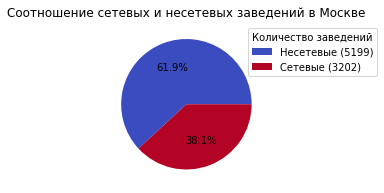

Несетевые    5199
Сетевые      3202
Name: chain, dtype: int64

In [44]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(3, 3))

# Строим круговую диаграмму с использованием plot(kind='pie')
df['chain'].value_counts().plot(kind = 'pie',
                                labels=None,
                                title = f'Соотношение сетевых и несетевых заведений в Москве',
                                autopct='%1.1f%%',  
                                colors=['#3b4cc0', '#b40426'])

# Настроим легенду и оси 
plt.legend([f'{label} ({count})' for label, count in zip(['Несетевые', 'Сетевые'], df['chain'].value_counts())],
    title="Количество заведений", loc='upper right', bbox_to_anchor=(1.7, 1))
plt.ylabel('') 
plt.show()
df['chain'].map({0: 'Несетевые', 1: 'Сетевые'}).value_counts()

<div class="alert alert-lavender" style="background-color: #e6e6fa; color: #000;">  Соотношение 2:1 создает здоровую конкуренцию между сетевыми и независимыми форматами. 

Несетевых заведений больше почти на 24% Высокий процент (62%) несетевых заведений указывают на развитую культуру малого предпринимательства в сфере общепита. Потребителям нравится уникальность заведений. Умеренное присутствие сетевых заведений (38%) - типичный показатель для крупных городов, почти каждое 3 заведение сетевое, что показывает значительные инвестиции в этот сегмент. </div>

Проверим какие категории заведений являются больше сетевыми а какие нет. Создадим сводную таблицу с кол-вом сетевых и не сетевых завдедений и долей сетевых заведений. 

In [45]:
# Создаем сводную таблицу с количеством
pivot = df.pivot_table(index = 'category', columns = 'chain', aggfunc = 'size').reset_index() 

# Переименовываем столбцы для ясности
pivot = pivot.rename(columns={0: 'Несетевые', 1: 'Сетевые'})

# Добавляем столбец с долей
pivot['Доля сетевых'] = pivot['Сетевые'] / (pivot['Несетевые'] + pivot['Сетевые'])

# Форматируем вывод
pivot['Доля сетевых'] = pivot['Доля сетевых'].map('{:.1%}'.format)

# Сортируем по доле сетевых заведений
pivot.sort_values('Доля сетевых', ascending=False).style.background_gradient(cmap='coolwarm', axis=0)

chain,category,Несетевые,Сетевые,Доля сетевых
1,булочная,99,157,61.3%
5,пиццерия,303,330,52.1%
4,кофейня,693,719,50.9%
2,быстрое питание,371,232,38.5%
6,ресторан,1313,729,35.7%
3,кафе,1597,779,32.8%
7,столовая,227,88,27.9%
0,"бар,паб",596,168,22.0%


Построим график по созданной таблице

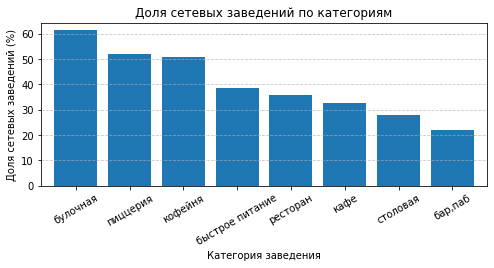

In [46]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 3))

# Строим столбчатуб диаграмму
df.groupby('category')['chain'].mean().mul(100).sort_values(ascending=False).plot(kind='bar', 
                                                                                  width=0.8, 
                                                                                  rot = 30,
                                                                                 title = f'Доля сетевых заведений по категориям',
                                                                                 ylabel = 'Доля сетевых заведений (%)', 
                                                                                 xlabel = 'Категория заведения')

# Добавляем сетку графика
plt.grid(axis='y', linestyle='--', alpha=0.7)

<div class="alert alert-lavender" style="background-color: #e6e6fa; color: #000;"> Больше всего сетевых заведений это булочные - их доля составляет 61%, второе место делят пиццерия (52%) и кофейня (51%). По этим трем категориям сетевые заведения преобладают над несетевыми, что говорит о том что люди предопочитают уже более популярные и известные заведения, а так же бизнес модель этих заведений проще маштабировать в сетевой формат. Середину занимают заведения с категориями: быстрое питание (38%) рестораны (35%) и кафе (32%) тут уже соотноешение несетевых к сетевым примерно 3:1 что говорит о здоровой конкуренции между частным предпринимательством и сетей. Меньше всего сетевых заведений по категориям столовая (28%) и паб, бар (22%) по столовым можно сказать что тут играет локальная специфика, часто они располагаются в общественных места(больница, завод) и сложно этот формат маштабировать в сетевой, а бары часто посетители ценят аутентичную атмосферу и индивидуальный стиль заведений, что объясняет низкую долю сетевых заведений. </div>

### 3.4. Количество посадочных мест

Исследуем количество посадочных мест в заведениях. Посмотрим встречаются ли в данных аномальные значения или выбросы? Посмотрим для каждой категории заведений наиболее типичное для него количество посадочных мест.

При знакомстве с данными вначале стоит оценить статические показатели. Для этого используем метод `describe()`:

In [47]:
# Посмотрим общие данные 
df['seats'].describe()

count    4792.000000
mean      108.361435
std       122.841133
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Можно предположить что данные имеют правое асимметричное распределение т.к. максимальное значение сильно больше медианы и стандартное отклонение имеет большое значение что говорит о широком разбросе в данных.

дополнительно посмотрим значения 90, и с 95 по 99 процентилей 

In [48]:
df['seats'].describe(percentiles=[0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

count    4792.000000
mean      108.361435
std       122.841133
min         0.000000
50%        75.000000
90%       240.000000
95%       307.000000
96%       350.000000
97%       350.000000
98%       480.000000
99%       625.000000
max      1288.000000
Name: seats, dtype: float64

Видим что 99% процентиль - имеет большое значение 625 что может говорить о большом ресторане или баре, который подразумаевается как ночной клуб действительно такое кол-во мест имеет место быть. А в от максимальное значение большое. Дополнительно проверим это и построим гистограмму распределения значений и диаграмму размаха для столбца с балансом.

In [1]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 5))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['seats'].plot(
                kind='hist', 
                bins=80, 
                alpha=0.75,
                edgecolor='black',
                rot=0,)

# Настраиваем оформление графика
plt.title('Количество посадочных мест')
plt.xlabel('Кол-во мест')
plt.ylabel('Кол-во заведений')

# Добавляем сетку графика
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Выводим график
plt.show()

NameError: name 'plt' is not defined

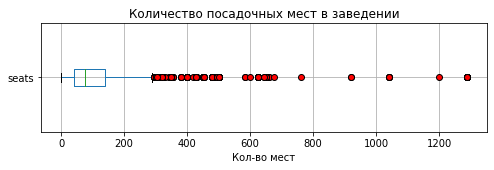

In [50]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 2))

# Строим диаграмму размаха значений в столбце seats
df.boxplot(column='seats', vert=False, flierprops=dict(markerfacecolor='r', marker='o'))

# Добавляем заголовок и метки оси
plt.title('Количество посадочных мест в заведении')
plt.xlabel('Кол-во мест')

# Выводим график
plt.show()

Распределение действительно имеет правоасимметричное распределение и мы видим много значений выходящие за границы «усов» что не всегда может говорить о выбросах, т.к. заведения с большим количеством мест имеют место быть и стоит проверить их по категориям, что мы сейчас и сделаем.

In [51]:
# Сгруппируем зведения по категории
category_seats = df.groupby('category')['seats'].agg(['mean', 'median', 'count', 'max', 'min'])
category_seats.sort_values('median', ascending=False)

,mean,median,count,max,min
category,,,,,
ресторан,121.892044,86.0,1269,1288.0,0.0
"бар,паб",124.477516,82.0,467,1288.0,0.0
кофейня,111.199730,80.0,751,1288.0,0.0
столовая,99.750000,75.5,164,1200.0,0.0
быстрое питание,98.891121,65.0,349,1040.0,0.0
кафе,97.365654,60.0,1217,1288.0,0.0
пиццерия,94.496490,55.0,427,1288.0,0.0
булочная,89.385132,50.0,148,625.0,0.0


Построим диаграмму размаха по категориям

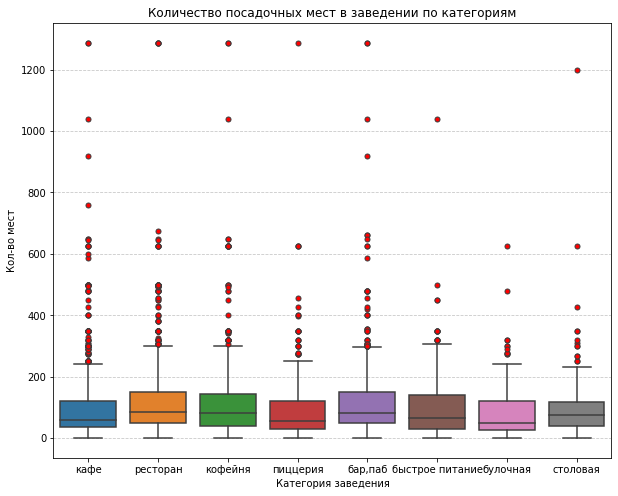

In [52]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 8))

# Строим диаграмму размаха значений в столбце seats
sns.boxplot(data=df, x='category',
             y='seats', flierprops=dict(markerfacecolor='r', marker='o'))
# Добавляем заголовок и метки оси
plt.title('Количество посадочных мест в заведении по категориям')
plt.ylabel('Кол-во мест')
plt.xlabel('Категория заведения')

# Добавляем сетку графика
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Выводим график
plt.show()

Отключим отображение 'выбросов' на диаграмме аргументом `showfliers=False`

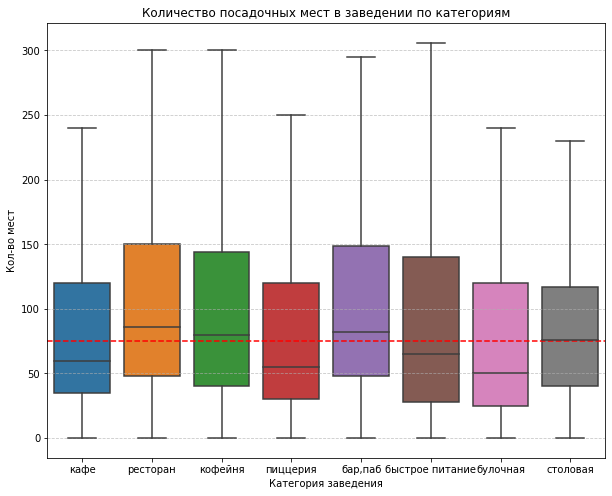

In [53]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 8))

# Строим диаграмму размаха значений в столбце seats
sns.boxplot(data = df,
             x='category',
             y='seats',
             showfliers=False)
# Добавляем заголовок и метки оси
plt.title('Количество посадочных мест в заведении по категориям')
plt.ylabel('Кол-во мест')
plt.xlabel('Категория заведения')

# Добавляем линию среднего рейтинга
plt.axhline(y = df['seats'].median(), color='red', linestyle='--', label=f"Среднее: {df['seats'].median():.2f}")

# Добавляем сетку графика
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Выводим график
plt.show()

<div class="alert alert-lavender" style="background-color: #e6e6fa; color: #000;"> Практически во всех категориях присутствуют выбросы (точки за пределами “усов” boxplot), что указывает на наличие заведений с аномально большим количеством посадочных мест. Эти выбросы могут быть крупными ресторанами, банкетными залами или крупными футкортами с большим количеством мест.

Медианное количество посадочных мест довольно схоже для большинства категорий (кафе, ресторан, кофейня, пиццерия, бар/паб, быстрое питание, булочная, столовая), в основном находятся в диапазоне от 50 до 86. Это говорит о том, что “типичное” заведение каждой категории имеет примерно одинаковое количество мест.
Разброс значительно различается между категориями. Это указывает на то, что, хотя медианные значения схожи, в некоторых категориях есть заведения как с очень малым, так и с очень большим количеством посадочных мест. </div>

### 3.5. Рейтинг заведений

Исследуем рейтинг заведений. Посмотрим распределение средних рейтингов по категориям заведений. 

Оценим статические показатели для столбца `rating` и посмотрим как он распределяется.

In [54]:
# Посмотрим общие данные 
df['rating'].describe()

count    8401.000000
mean        4.230258
std         0.469826
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

По статическим показателям видим нормальное распределение значений рейтинга, нет аномальных значений. Медианное значение почти равно среднему. Посмотрим на распределениена гистрограмме.

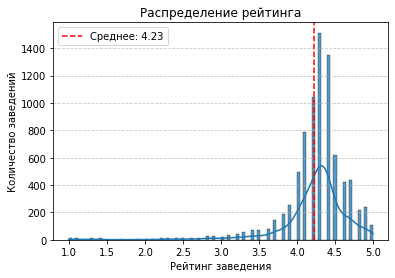

In [55]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(6, 4))

# Строим гистограмму с помощью pandas через plot(kind='hist')
sns.histplot(data=df['rating'],
              bins=100,
              kde=True,
              alpha=0.75,
              edgecolor='black',
              stat='count') 

# Настраиваем оформление графика
plt.title('Распределение рейтинга')
plt.xlabel('Рейтинг заведения')
plt.ylabel('Количество заведений')
plt.axvline(df['rating'].mean(), color='red', linestyle='--', label=f'Среднее: {df["rating"].mean():.2f}')
plt.legend()
# Добавляем сетку графика
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Выводим график
plt.show()

Гистограмма показала что распределения немного скошено влево, это значит что заведений с рейтингом выше среднего больше, чем заведений с рейтингом ниже среднего. Посмотрим как средний рейтинг распределяется по категориям заведений. Для этого построим столбчатую диаграмму.

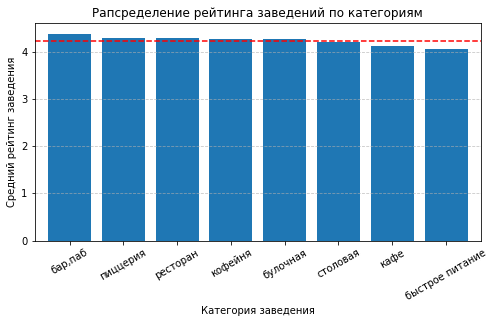

In [56]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 4))

# Строим столбчатуб диаграмму
df.groupby('category')['rating'].mean().sort_values(ascending=False).plot(kind='bar',
                                 width=0.8,
                                 rot = 30,
                                 title = f'Рапсределение рейтинга заведений по категориям',
                                 ylabel = 'Средний рейтинг заведения', 
                                 xlabel = 'Категория заведения')

# Добавляем линию среднего рейтинга
plt.axhline(y = df['rating'].mean(), color='red', linestyle='--', label=f'Среднее: {df["rating"].mean():.2f}')

# Добавляем сетку графика
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Выводим график
plt.show()

In [57]:
# Посмотрим как распределяются статическим показатели рейтинга по категориям заведения
df.groupby('category')['rating'].describe().sort_values(by = 'mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",764.0,4.387697,0.380392,1.1,4.3,4.4,4.6,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
ресторан,2042.0,4.290401,0.413143,1.0,4.2,4.3,4.5,5.0
кофейня,1412.0,4.278753,0.368250,1.4,4.1,4.3,4.4,5.0
булочная,256.0,4.268360,0.386303,1.3,4.2,4.3,4.4,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0
кафе,2376.0,4.124284,0.566001,1.0,4.0,4.2,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0


<div class="alert alert-lavender" style="background-color: #e6e6fa; color: #000;"> Средний рейтинг заведений составляет 4,23. Максимальное кол-во располагается выше среднего, основная концентрация рейтинга между 4 - 4,5 что говорит о том что заведения стараются держать положительные оценки. Присутствуют плохой ретинг ниже 3, но их значительно меньше положительных. По категориям самые высокие оценки получили заведения - бары и пабы, видимо все уходят с хорошим настроением 😀 Кафе имеет максимальный разброс по оценкам, пиццерия и булочная более стабильны - у них самый маленький разброс, а вот быстрое питание лидирует по самым низким оценкам. </div>

### 3.6. Изучение взаимосвязей между данными

Рассмотрим с какими данными показывают самую сильную корреляцию рейтинги заведений. Построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. 

Рассчитаем матрицу корреляции `phi_k`

interval columns not set, guessing: ['rating', 'chain', 'seats']


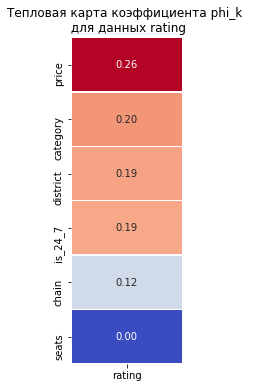

,rating
price,0.262056
category,0.199065
district,0.189582
is_24_7,0.186460
chain,0.118926
seats,0.000000


In [58]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['rating', 'category', 'district', 'chain', 'seats', 'price',
                         'is_24_7']].phik_matrix()

# Сохраняем матрицу корреляции признака rating с другими признаками заведений
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
plt.figure(figsize=(2, 6))
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')

# Выводим график
plt.show()
data_heatmap

Матрица показывает что самая сильная связь с ретингом заведением связана с категорией цены. Давайте проверим эту связь

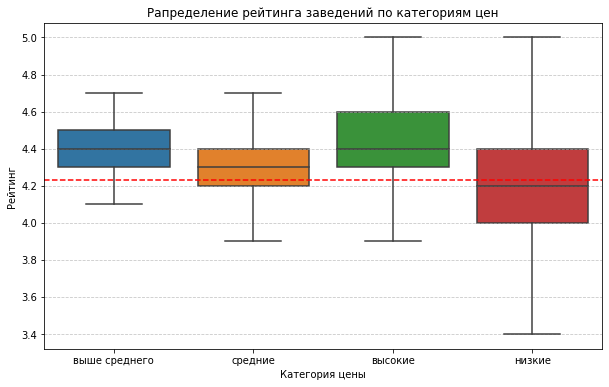

,mean,count
price,,
высокие,4.436611,478
выше среднего,4.386348,564
низкие,4.173077,156
средние,4.297874,2117


In [59]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим диаграмму размаха значений в столбце rating
sns.boxplot(data = df,
             x='price',
             y='rating', 
             showfliers=False)

# Добавляем заголовок и названия осей
plt.title('Рапределение рейтинга заведений по категориям цен')
plt.xlabel('Категория цены')
plt.ylabel('Рейтинг')

# Добавляем линию среднего рейтинга
plt.axhline(y = df['rating'].mean(), color='red', linestyle='--', label=f'Среднее: {df["rating"].mean():.2f}')

# Добавляем сетку графика
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Выводим график
plt.show()

display(df.groupby('price')['rating'].agg(['mean', 'count']))

<div class="alert alert-lavender" style="background-color: #e6e6fa; color: #000;"> Больше половины данных отсутствуют для выявления точной зависимости, но по тем данным которые у нас есть, можно заметить связь. Чем выше категория цены тем выше рейтинг и более маленький разброс. Заведения с низкими категориями цен имеют рейтинг ниже среднего и у них больше разброс цен они имеют как максимальные оценки так и минимальные. Это говорит о том что дорогие заведения более стабильны по качеству обслуживания и стараются деражть высокие оценки.  </div>

### 3.7. Изучим сетевые заведения Москвы

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Посчитаем значения среднего рейтинга.

In [60]:
# Создадим таблицу
df_top15 = df[df['chain'] == 1].groupby(['name', 'category']).agg({'id': 'count', 'rating': 'mean'}
                                        ).rename(columns={'id': 'количество', 'rating': 'средний рейтинг'}
                                                ).sort_values('количество', ascending=False).head(15).reset_index()
# Сдвигаем индекс
df_top15.index = df_top15.index + 1
# Выврдим таблицу
display(df_top15.style.background_gradient(cmap='coolwarm', axis=0))

,name,category,количество,средний рейтинг
1,шоколадница,кофейня,119,4.178151
2,доминос пицца,пиццерия,76,4.169737
3,додо пицца,пиццерия,74,4.286487
4,one price coffee,кофейня,71,4.064789
5,яндекс лавка,ресторан,69,3.872464
6,cofix,кофейня,65,4.075385
7,prime,ресторан,49,4.114285
8,кофепорт,кофейня,42,4.147619
9,кулинарная лавка братьев караваевых,кафе,39,4.394872
10,теремок,ресторан,36,4.105556


Построим графики по ТОП-15 заведений по количеству и среднему рейтингу. Используем столбчатые диаграммы.

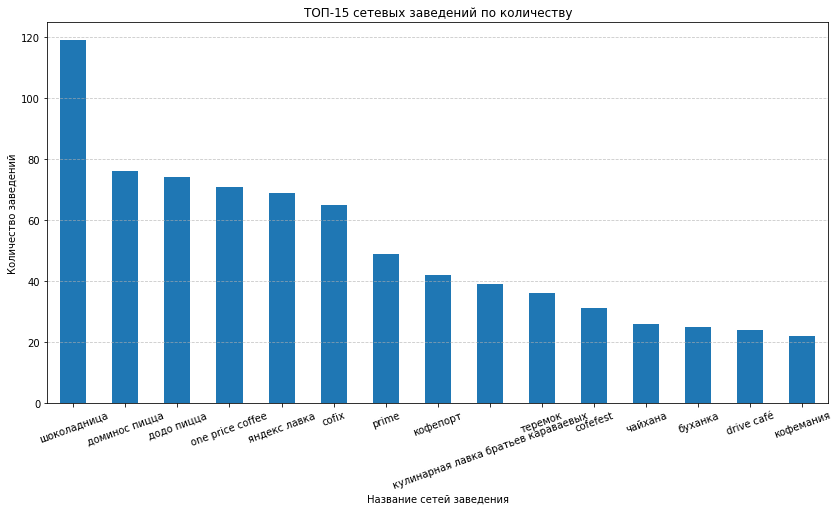

In [61]:
# Строим столбчатуб диаграмму
df_top15.plot.bar(x='name', y='количество', legend = False, rot = 20, figsize=(14, 7),
                                 title = f'ТОП-15 сетевых заведений по количеству',
                                 ylabel = 'Количество заведений', 
                                 xlabel = 'Название сетей заведения')

# Добавляем сетку графика
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Выводим график
plt.show()

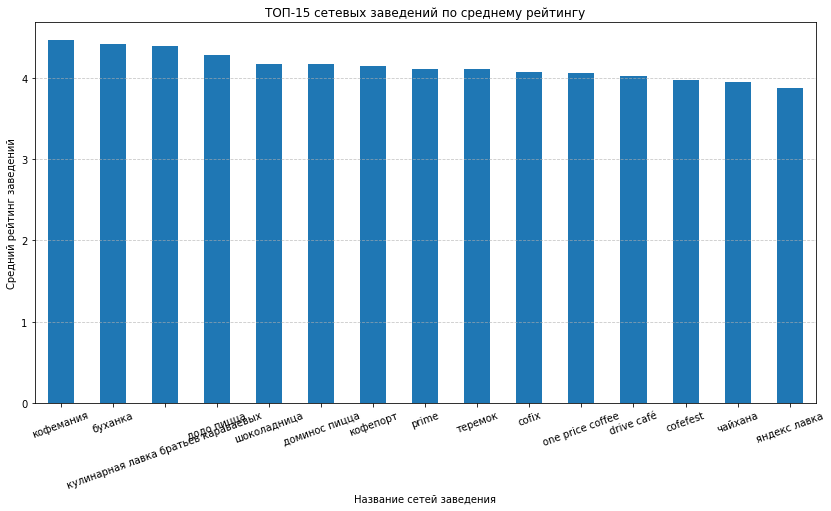

In [62]:
# Строим столбчатуб диаграмму
df_top15.sort_values(by = 'средний рейтинг', ascending=False).plot.bar(x='name', y='средний рейтинг', legend = False, rot = 20, figsize=(14, 7),
                                 title = f'ТОП-15 сетевых заведений по среднему рейтингу',
                                 ylabel = 'Средний рейтинг заведений', 
                                 xlabel = 'Название сетей заведения')

# Добавляем сетку графика
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Выводим график
plt.show()

In [63]:
# Комментарий ревьюера
tmp = df.copy()          # создаем копию текущего датасета
name_tmp = 'муму'       # задаем имя столбца для проверки уникальных категорий
print(f'Заведения с одинаковым именем {name_tmp} относятся к разным категориям:\n\
{", ".join(tmp[tmp.name == name_tmp].category.unique())}')

Заведения с одинаковым именем муму относятся к разным категориям:
кафе, ресторан, кофейня, быстрое питание, пиццерия, столовая, бар,паб


In [64]:
category_stats = df_top15.groupby('category').agg(
    количество_сетей=('количество', 'count'),  # Кол-во сетевых брендов в категории
    общее_количество_заведений=('количество', 'sum'),  # Суммарное число заведений
    средний_рейтинг=('средний рейтинг', 'mean')  # Средний рейтинг по категории   
).sort_values('общее_количество_заведений', ascending=False)

# Стилизуем вывод
display(category_stats.style.background_gradient(cmap='coolwarm', axis=0))

,количество_сетей,общее_количество_заведений,средний_рейтинг
category,,,
кофейня,6,350,4.151166
ресторан,3,154,4.030768
пиццерия,2,150,4.228112
кафе,3,89,4.122008
булочная,1,25,4.416000


<div class="alert alert-lavender" style="background-color: #e6e6fa; color: #000;"> Среди топ-15 сетевых заведений лидирует 'шоколадница' c количеством 119 заведений что имеет  3,7% среди всех сетевых заведений Москвы, на втором месте 'доминос пицца' c количеством 76 заведений по Москве а на третьем месте 'додо пицца' с 74 заведений. Интересно что топ-15 вошло 2 пиццерии и они занимают лидирующие позиции по кол-ву заведений. Кофейные сети доминируют среди топов, целых 6 различных сетей. Самый высокий рейтинг среди топ-15 вошла имеет сеть кофеин 'кофемания' со среднем рейтингом 4,46  и не отстает всего 1 сеть булочных 'буханка' с рейтингом 4,41 (видимо там очень вкусные булочки)  </div>

### 3.8. Средний чек заведения

Изучим вариацию среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы. Проанализируем цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях.

Изучим сначала общее распределение данных по столбцу middle_avg_bill

In [65]:
# Посмотрим общие данные по столбцу middle_avg_bill
df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053650
std       1009.732849
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

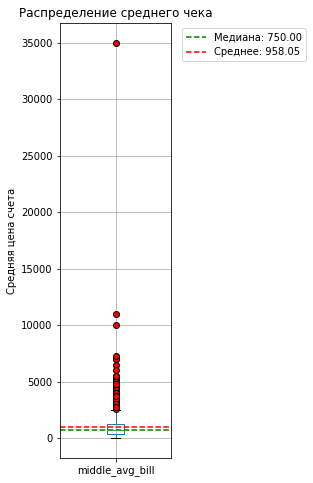

In [66]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(2, 8))

# Строим диаграмму размаха значений в столбце middle_avg_bill
df.boxplot(column='middle_avg_bill', flierprops=dict(markerfacecolor='r', marker='o'))

# Добавляем заголовок и метки оси
plt.title('Распределение среднего чека')
plt.ylabel('Средняя цена счета')

# Добавляем линию среднего рейтинга и медианы
plt.axhline(y = df['middle_avg_bill'].median(), color='green', linestyle='--', label=f'Медиана: {df["middle_avg_bill"].median():.2f}')
plt.axhline(y = df['middle_avg_bill'].mean(), color='red', linestyle='--', label=f'Среднее: {df["middle_avg_bill"].mean():.2f}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

# Выводим график
plt.show()

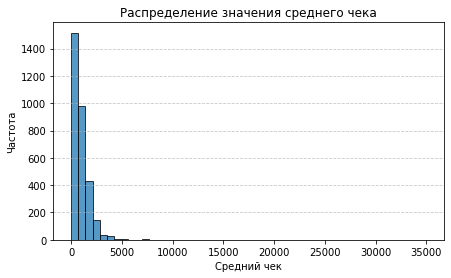

In [67]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 4))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['middle_avg_bill'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.75,
                edgecolor='black',
                rot=0, 
)

# Настраиваем оформление графика
plt.title('Распределение значения среднего чека')
plt.xlabel('Средний чек')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Выводим график
plt.show()

По графику распределения и статистическим описанием данных, видим что данные имеют выбросы в максимальном значении. И данные распределены не равномерно с большим отклонением вправо, что говорит о наибольшое кол-во значений располагаются до медианы. 

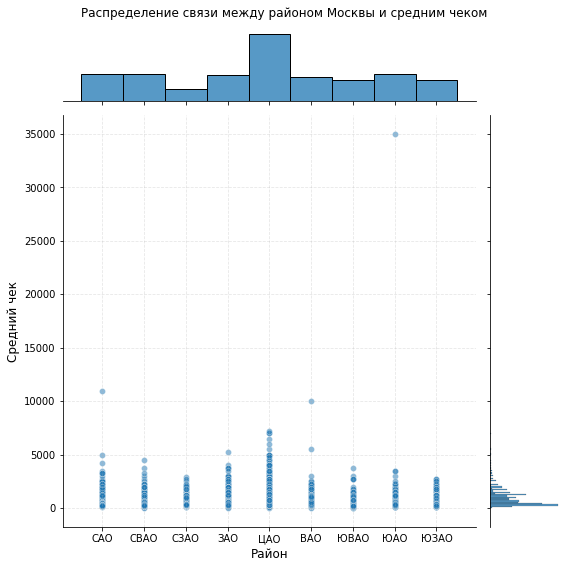

In [68]:
# Построим график совместного распределения для столбцов `score` и `Balance`
g = sns.jointplot(data=df, x='district', y='middle_avg_bill', height=8, alpha=0.5, linewidth=0.5)
  
# Добавление сетки
g.ax_joint.grid(True, linestyle='--', alpha=0.3)

# Подписываем и отображаем график
g.ax_joint.set_xlabel('Район', fontsize=12)
g.ax_joint.set_ylabel('Средний чек', fontsize=12)
plt.suptitle('Распределение связи между районом Москвы и средним чеком')
plt.tight_layout()
plt.show()

По распределению видим выбросы в Южном округе, в Восточном округе и Северном, по остальным округам данные распределены в полне реалистично. Больше всего средний чек в Центральном округе (самый высокий столбик). Сравним цены в центральном административном округе с другими

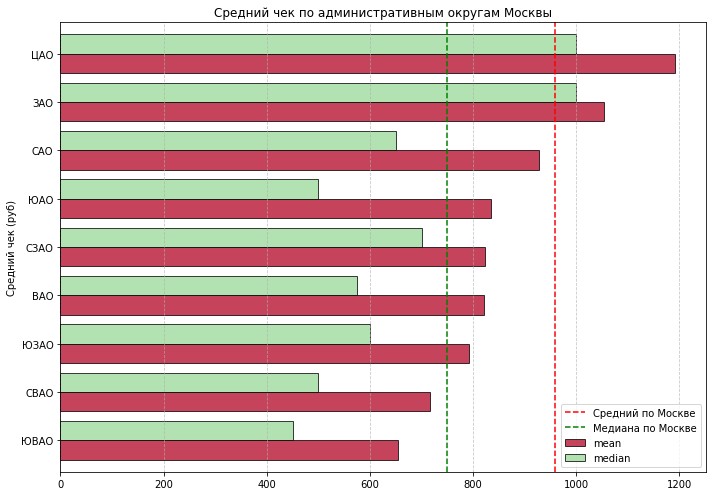

Средний чек по Москве: 958.05
Медианный чек по Москве: 750.00


,mean,median,count
district,,,
ЦАО,1191.057495,1000.0,1060
ЗАО,1053.225464,1000.0,306
CАО,927.959656,650.0,322
ЮАО,834.398071,500.0,314
СЗАО,822.222900,700.0,157
ВАО,820.626953,575.0,260
ЮЗАО,792.561707,600.0,235
СВАО,716.611267,500.0,301
ЮВАО,654.097961,450.0,194


In [69]:
# Строим диаграмму
df.groupby('district')['middle_avg_bill'].agg(['mean', 'median']).sort_values(by='mean').plot(kind='barh',
    edgecolor='black', alpha=0.75, width=0.8, figsize=(10, 7), color = ['#b40426', '#98D898'],
    title='Средний чек по административным округам Москвы',
    xlabel='Средний чек (руб)',
    ylabel='Округ Москвы')    
         
  
# Настройка графика
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(x=df['middle_avg_bill'].mean(), color='red', linestyle='--', label='Средний по Москве')
plt.axvline(x=df['middle_avg_bill'].median(), color='green', linestyle='--', label='Медиана по Москве')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Средний чек по Москве: {df['middle_avg_bill'].mean():.2f}")
print(f"Медианный чек по Москве: {df['middle_avg_bill'].median():.2f}")

groupby_district = df.groupby('district')['middle_avg_bill'].agg(['mean', 'median', 'count'])
groupby_district.sort_values('mean', ascending=False)

<div class="alert alert-lavender" style="background-color: #e6e6fa; color: #000;"> 
Различие между средним чеком по Москве (958.05 руб.) и медианным (750 руб.) отчетливо указывает на наличие выбросов, то есть, на значительное влияние отдельных заведений с очень высоким чеком. Это говорит о том, что распределение чеков скошено вправо. Важно помнить, что высокие значения не обязательно являются выбросами в статистическом смысле; они могут отражать реальную картину, где определенные категории заведений (например, рестораны премиум-класса) закономерно предлагают более высокие цены.
    
Анализ по округам:

Лишь в двух округах средний чек превышает общемосковский показатель. Это свидетельствует о том, что большинство районов предлагают цены ниже среднего.

Лидеры:

Центральный административный округ (ЦАО): Средний чек в ЦАО на 24% выше общемосковского, что делает его самым дорогим округом. Это объясняется высокой концентрацией ресторанов премиум-класса, дорогих бутиков и бизнес-центров, где высока платежеспособность посетителей. Кроме того, ЦАО является туристическим центром, где цены традиционно выше. Важно отметить, что отсутствие явных выбросов и близость среднего и медианного значений указывает на относительную однородность ценовой политики в этом округе.
Западный административный округ (ЗАО): ЗАО занимает второе место с превышением среднего чека почти на 10%. ЗАО - престижный район, характеризующийся дорогим жильем, офисами и парковыми зонами. Следовательно, можно ожидать более высоких цен в ресторанах и кафе. Близость к деловому центру “Москва-Сити” также оказывает влияние. Как и в ЦАО, отсутствие выбросов и близость среднего и медианного значений повышают уверенность в анализе.
    
Аутсайдеры: Округа с чеком ниже среднего

Юго-Восточный административный округ (ЮВАО): Средний чек в ЮВАО на 31,7% ниже среднего по Москве, что делает его самым доступным округом. ЮВАО - это, в основном, спальный район с более низким уровнем дохода населения, что, соответственно, влияет на ценовую политику местных заведений. Кроме того, здесь может быть большая доля столовых и кафе с более доступными ценами.
Северо-Восточный административный округ (СВАО): СВАО также предлагает более доступные цены, где средний чек ниже общемосковского на 25%. Как и ЮВАО, СВАО характеризуется большим количеством жилых массивов и меньшим количеством дорогих ресторанов и развлекательных заведений.
    
Округа с выбросами: Южный, Восточный и Северный округа, похоже имеют некоторое увеличение среднего чека из-за выбросов. Следует внимательно изучить эти округа, чтобы понять природу выбросов. Возможно, это ошибка в данных или наличие небольшого числа дорогих заведений, существенно влияющих на среднее. Исключение выбросов позволит более точно оценить средний чек в этих районах.    
</div>

---

Иследовательский анализ показал что рынок общепита Москвы разнообразен и конкурентноспособен: 

- Структура рынка: Кафе и рестораны доминируют, кофейни и бары также занимают значимые позиции. Этот факт стоит учитывать при планировании открытия нового заведения: либо выбирать популярную категорию, либо найти незаполненную нишу.
- Географическое распределение: Центр Москвы (ЦАО) является главным центром общепита, значительно опережая другие округа. Остальные округа поделены примерно равномерно, с небольшим отставанием Северо-Западного. ЦАО - перспективное место для бизнеса, но также самое конкурентное. 
- Преобладание несетевых заведений указывает на развитый малый бизнес и любовь потребителей к уникальности. Однако, значительная доля сетевых заведений говорит об их важном присутствии на рынке. Эта информация важна для понимания конкурентной среды и выбора бизнес-модели.
- Сетевые в различных категориях: Булочные, пиццерии и кофейни: Сетевые игроки преобладают, что может указывать на предпочтение потребителей известных брендов в этих категориях, или на более легкую масштабируемость. Быстрое питание, рестораны и кафе: Наблюдается здоровая конкуренция между сетями и частными заведениями. Столовые и бары: Низкая доля сетей, вероятно, связана с локальной спецификой и уникальной атмосферой, которые сложно воспроизвести в масштабе.
- Популярность кофейной культуры: Кофейные сети занимают прочные позиции на рынке, что говорит о развитой культуре потребления кофе в Москве.
- Средний рейтинг (4,23) подтверждает общую положительную оценку заведений в Москве. Высокая концентрация оценок в диапазоне 4-4,5 свидетельствует о том, что большинство заведений стремятся поддерживать качественный сервис и положительную репутацию. Наличие отрицательных оценок (ниже 3) говорит о том, что недостатки всё же встречаются, но их доля относительно невелика.
- Ценовая политика в сфере общепита Москвы тесно связана с социально-экономическими особенностями каждого административного округа. В центре города (ЦАО) доминируют заведения с высоким средним чеком (превышение среднего чека в ЦАО над всеми остальными округами на 47.1%), что обусловлено высокой концентрацией деловых и туристических объектов, а также высоким уровнем доходов населения. Западный округ (ЗАО), также характеризуется относительно высокими ценами, что соответствует его статусу престижного жилого района. Напротив, в спальных районах (ЮВАО, СВАО) преобладают заведения с более доступными ценами, ориентированные на потребителей с более низким уровнем дохода. Наличие выбросов в некоторых округах (ЮАО, ВАО, САО) указывает на неоднородность ценовой политики и возможное присутствие отдельных заведений с аномально высокими ценами, которые, тем не менее, не определяют общую картину для округа.

---

## 4. Итоговый вывод и рекомендации

### Обзор проделанной работы:

В ходе исследования проанализировали данные 8401 заведений общественного питания в Москве. Были изучены категории заведений, их расположение, количество, рейтинги и популярность среди потребителей. Это позволило получить представление о текущей ситуации, предпочтениях клиентов и конкурентной среде.

### Ответы на вопросы и главные выводы:

**Популярность категорий заведений:**
- Кафе и рестораны доминируют (50%+ рынка), кофейни на 3-м месте (16,8%);
- Бары/пабы (9%) и фастфуд (7,5%) имеют устойчивый спрос;
- Столовые и булочные (3%) менее востребованы.
  
<font color='blue'>*При открытии нового заведения стоит ориентироваться на кафе, рестораны или кофейни, но учитывать высокую конкуренцию.*</font>

**Распределение заведений по округам:**
- ЦАО лидирует (26,7% заведений), особенно по ресторанам (30%) и барам (47%);
- СЗАО — аутсайдер (4,9%).
  
<font color='blue'>*В ЦАО выгодно открывать премиальные заведения, в спальных округах — демократичные форматы.*</font>

**Сетевые vs независимые заведения:**
- Несетевых заведений больше (62%), что говорит о развитом малом бизнесе;
- Сетевые доминируют в булочных (61%), пиццериях (52%) и кофейнях (51%) — легче масштабировать.
  
<font color='blue'>*Для франшиз лучше выбирать форматы с высокой долей сетей (кофейни, фастфуд).*</font>

**Посадочные места:**
- Медианное значение для большинства категорий — 50–86 мест;
- Выбросы (крупные заведения) есть во всех категориях.
  
<font color='blue'>*Оптимальный размер заведения — 50–100 мест. Крупные проекты (200+ мест) требуют особой локации.*</font>

**Рейтинги заведений:**
- Средний рейтинг — 4,23, большинство оценок 4–4,5;
- Лучшие оценки у баров/пабов, худшие — у фастфуда;
- Дорогие заведения стабильнее по качеству (меньше разброс оценок).
  
<font color='blue'>*Для высоких оценок важны атмосфера (бары) и стабильность (рестораны).*</font>

**Средний чек:**
- ЦАО дороже на 24% (1191 ₽ vs 958 ₽ по Москве);
- ЗАО на втором месте (+10%), ЮВАО и СВАО дешевле на 25–32%.
  
<font color='blue'>*В ЦАО и ЗАО можно завышать цены, в спальных округах — делать акцент на доступность.*</font>

### Рекомендации:

Москва сегментирована по ценам и спросу. Успех заведения зависит от локации, формата и ценовой политики.

- Общие рекомендации для бизнеса
- Премиум-сегмент (рестораны, бары) — ЦАО.
- Бюджетные форматы (столовые, фастфуд) — ЮВАО, СВАО.
- Сетевые проекты — кофейни, пиццерии, булочные.
- Уникальные концепции — независимые бары, кафе.
- Оптимальный размер — 50–100 мест, крупные заведения — только в проходимых местах.